<a href="https://colab.research.google.com/github/jjlee6496/one-by-one/blob/main/Finance/%EC%83%81%EB%8C%80%EC%A3%BC%EA%B0%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! pip install --upgrade pandas-datareader

In [ ]:
!pip install plotly==3.10.0
!pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.5 MB 1.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=8a818ef9d6a2310b8549bf293b12dc4f5ce90c6d1fceb8e9c2c72868fb776cf6
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 3.10.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |███████████████████████████████

In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 846 kB/s 


In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.2 MB/s 


In [ ]:
import seaborn as sns
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

# 야후파이낸스

In [ ]:
# end = datetime.today()
# start = datetime(2019,1,1)

# #kodex = pdr.DataReader('069500.KS','yahoo',start,end) # KODEX 200 작동 안함
# kosdq = pdr.DataReader('232080.KS','yahoo',start,end) # TIGER 코스닥 150
# snp = pdr.DataReader('143850.KS','yahoo',start,end) # TIGER 미국 S&P 선물
# stx = pdr.DataReader('195930.KS','yahoo',start,end) # TIGER 유로스탁스 50 (합성, H)
# nikkei = pdr.DataReader('238720.KS','yahoo',start,end) # KINDEX 일본 닛케이225 (H)
# csi = pdr.DataReader('192090.KS','yahoo',start,end) # TIGER 차이나 CSI300

# ksf_10 = pdr.DataReader('148070.KS','yahoo',start,end) # KOSEF 국고채 10년
# kb = pdr.DataReader('136340.KS','yahoo',start,end) # KBSTAR 중기우량회사채
# dsh = pdr.DataReader('182490.KS','yahoo',start,end) # TIGER 단기선진하이일드(합성, H)

# gold = pdr.DataReader('132030.KS','yahoo',start,end) # KODEX 골드선물(H)
# oil = pdr.DataReader('130680.KS','yahoo',start,end) # TIGER 원유선물Enhanced(H)

# kodex_inv = pdr.DataReader('114800.KS','yahoo',start,end) # KODEX 인버스
# ksf_dollar = pdr.DataReader('138230.KS','yahoo',start,end) # KOSEF 미국달러선물
# ksf_dollar_inv = pdr.DataReader('139660.KS','yahoo',start,end) # KOSEF 미국달러선물인버스
# ksf_short = pdr.DataReader('130730.KS','yahoo',start,end) # KOSEF 단기자금


# 네이버 증권 크롤링
야후가 3월 이후 데이터가 없음  
https://sguys99.github.io/trading03  
페이지별로 가져오는거라 페이지 찾아봐야 함

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from datetime import datetime

In [ ]:
def get_stock_price(code, num_of_pages, sort_date = True):
    url = f"http://finance.naver.com/item/sise_day.nhn?code={code}"
    headers = {'User-agent': 'Mozilla/5.0'} 
    bs = BeautifulSoup(requests.get(url=url, headers = headers).text, 'html.parser')
    pgrr = bs.find("td", class_="pgRR")
    last_page = int(pgrr.a["href"].split('=')[-1])
    
    pages = min(last_page, num_of_pages) # 마지막 페이지와 가져올 페이지 수 중에 작은 값 선택
    df = pd.DataFrame()

    for page in range(1, pages+1):
        page_url = '{}&page={}'.format(url, page)
        df = df.append(pd.read_html(requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}).text)[0])
        
    df = df.rename(columns={'날짜':'date','종가':'close','전일비':'diff'
                ,'시가':'open','고가':'high','저가':'low','거래량':'volume'}) #영문으로 컬럼명 변경
    df['date'] = pd.to_datetime(df['date']) 
    df = df.dropna()
    df[['close', 'diff', 'open', 'high', 'low', 'volume']] = \
                            df[['close','diff', 'open', 'high', 'low', 'volume']].astype(int) # int형으로 변경
    df = df[['date', 'open', 'high', 'low', 'close', 'diff', 'volume']] # 컬럼 순서 정렬
    df = df.sort_values(by ='date') # 날짜순으로 정렬
    
    if sort_date:
        df = df.reset_index(drop = True)
    
    return df

In [ ]:
# kodex = get_stock_price('069500', 84) #2018말 2019 초
# kodex.set_index('date', inplace=True)
# kodex.head()

In [ ]:
# kodex.to_csv("kodex.csv")

In [ ]:
# kosdq = get_stock_price('232080', 84) #2018말 2019 초
# kosdq.set_index('date', inplace=True)
# kosdq.head()

In [ ]:
# kosdq.to_csv("kosdq.csv")

In [ ]:
# snp = get_stock_price('143850', 84) #2018말 2019 초
# snp.set_index('date', inplace=True)
# snp.to_csv("snp.csv")

In [ ]:
# stx = get_stock_price('195930', 84)
# stx.set_index('date', inplace = True)
# stx.to_csv("stx.csv")

# nikkei = get_stock_price('238720', 84)
# nikkei.set_index('date', inplace = True)
# nikkei.to_csv("nikkei.csv")

# csi = get_stock_price('192090', 84)
# csi.set_index('date', inplace = True)
# csi.to_csv("csi.csv")

# ksf_10 = get_stock_price('148070', 84)
# ksf_10.set_index('date', inplace = True)
# ksf_10.to_csv("ksf_10.csv")

# kb = get_stock_price('136340', 84)
# kb.set_index('date', inplace = True)
# kb.to_csv("wooryang.csv")

# dsh = get_stock_price('182490', 84)
# dsh.set_index('date', inplace = True)
# dsh.to_csv("dsh.csv")

# gold = get_stock_price('132030', 84)
# gold.set_index('date', inplace = True)
# gold.to_csv("gold.csv")

# oil = get_stock_price('130680', 84)
# oil.set_index('date', inplace = True)
# oil.to_csv("oil.csv")

# kodex_inv = get_stock_price('114800', 84)
# kodex_inv.set_index('date', inplace = True)
# kodex_inv.to_csv("kodex_inv.csv")

# ksf_dollar = get_stock_price('138230', 84)
# ksf_dollar.set_index('date', inplace = True)
# ksf_dollar.to_csv("ksf_dollar.csv")

# ksf_dollar_inv  = get_stock_price('139660', 84)
# ksf_dollar_inv.set_index('date', inplace = True)
# ksf_dollar_inv.to_csv("ksf_dollar_inv.csv")

# ksf_short = get_stock_price('130730', 84)
# ksf_short.set_index('date', inplace = True)
# ksf_short.to_csv("short.csv")

# csv 불러오기

In [ ]:
kodex = pd.read_csv("kodex.csv")
kosdq = pd.read_csv("kosdq.csv")
snp = pd.read_csv("snp.csv")
stx = pd.read_csv("stx.csv")
nikkei=pd.read_csv("nikkei.csv")
csi = pd.read_csv("csi.csv")

ksf_10 = pd.read_csv("ksf_10.csv")
wooryang = pd.read_csv("wooryang.csv")
dsh = pd.read_csv("dsh.csv")

gold = pd.read_csv("gold.csv")
oil = pd.read_csv("oil.csv")

kodex_inv = pd.read_csv("kodex_inv.csv")
ksf_dollar = pd.read_csv("ksf_dollar.csv")
ksf_dollar_inv = pd.read_csv("ksf_dollar_inv.csv")
ksf_short = pd.read_csv("ksf_short.csv")

In [ ]:
# 혹시 필요할까봐
stock_list = [
              kodex,kosdq,snp,stx,nikkei,csi,
              ksf_10,wooryang,dsh,
              gold,oil,
              kodex_inv,ksf_dollar,ksf_dollar_inv,ksf_short
]

In [ ]:
# 날짜형으로 변경해서 기간별 자르기
kodex['date'] = pd.to_datetime(kodex['date'])
kosdq['date'] = pd.to_datetime(kosdq['date'])
snp['date'] = pd.to_datetime(snp['date'])
stx['date'] = pd.to_datetime(stx['date'])
nikkei['date'] = pd.to_datetime(nikkei['date'])
csi['date'] = pd.to_datetime(csi['date'])

ksf_10['date'] = pd.to_datetime(ksf_10['date'])
wooryang['date'] = pd.to_datetime(wooryang['date'])
dsh['date'] = pd.to_datetime(dsh['date'])

gold['date'] = pd.to_datetime(gold['date'])
oil['date'] = pd.to_datetime(oil['date'])

kodex_inv['date'] = pd.to_datetime(kodex_inv['date'])
ksf_dollar['date'] = pd.to_datetime(ksf_dollar['date'])
ksf_dollar_inv['date'] = pd.to_datetime(ksf_dollar_inv['date'])
ksf_short['date'] = pd.to_datetime(ksf_short['date'])

#### 구간별 나눌때

In [ ]:
from datetime import datetime, timedelta

start = datetime(2022,5,26)- timedelta(30)
end = datetime(2022,5,26)

# 구간별 나누기
kodex = kodex.query(f"'{start} '<= date <= '{end}'")
kosdq = kosdq.query(f"'{start} '<= date <= '{end}'")
snp = snp.query(f"'{start} '<= date <= '{end}'")
stx = stx.query(f"'{start} '<= date <= '{end}'")
nikkei = nikkei.query(f"'{start} '<= date <= '{end}'")
csi = csi.query(f"'{start} '<= date <= '{end}'")

ksf_10 = ksf_10.query(f"'{start} '<= date <= '{end}'")
wooryang = wooryang.query(f"'{start} '<= date <= '{end}'")
dsh = dsh.query(f"'{start} '<= date <= '{end}'")

gold = gold.query(f"'{start} '<= date <= '{end}'")
oil = oil.query(f"'{start} '<= date <= '{end}'")

kodex_inv = kodex_inv.query(f"'{start} '<= date <= '{end}'")
ksf_dollar = ksf_dollar.query(f"'{start} '<= date <= '{end}'")
ksf_dollar_inv = ksf_dollar_inv.query(f"'{start} '<= date <= '{end}'")
ksf_short = ksf_short.query(f"'{start} '<= date <= '{end}'")

#### 구간별 나누기 -> 날짜를 인덱스로 -> 그림

In [ ]:
# 인덱스를 날짜로
kodex.set_index('date', inplace = True)
kosdq.set_index('date', inplace = True)
snp.set_index('date', inplace = True)
stx.set_index('date', inplace = True)
nikkei.set_index('date', inplace = True)
csi.set_index('date', inplace = True)

ksf_10.set_index('date', inplace = True)
wooryang.set_index('date', inplace = True)
dsh.set_index('date', inplace = True)

gold.set_index('date', inplace = True)
oil.set_index('date', inplace = True)

kodex_inv.set_index('date', inplace = True)
ksf_dollar.set_index('date', inplace = True)
ksf_dollar_inv.set_index('date', inplace = True)
ksf_short.set_index('date', inplace = True)

# 시각화

## 전체그림

In [ ]:
eqt = pd.DataFrame({
    'kodex' : kodex['close'],
    'KOSDQ': kosdq['close'],
    'SP500': snp['close'],
    'STOXX': stx['close'],
    'NIKKEI': nikkei['close'],
    'CSI300': csi['close'],
    
    'gookchae': ksf_10['close'],
    'wooryang': wooryang['close'],
    'dsh' : dsh['close'],

    'gold': gold['close'],
    'oil': oil['close'],

    'kodex_inv' : kodex_inv['close'],
    'ksf_dollar': ksf_dollar['close'],
    'ksf_dollar_inv' : ksf_dollar_inv['close'],
    'ksf_short': ksf_short['close']
}).dropna()

In [ ]:
eqt.head()

,kodex,KOSDQ,SP500,STOXX,NIKKEI,CSI300,gookchae,wooryang,dsh,gold,oil,kodex_inv,ksf_dollar,ksf_dollar_inv,ksf_short
818,35560,12710,50455,12945,17615,9535,111605,102720,12095,12835,4955,4455,13095,9555,101275
819,35140,12500,49340,12755,17460,9840,111805,102710,12080,12810,5115,4510,13250,9440,101285
820,34985,12485,49670,12870,17775,9900,111830,102555,12060,12640,5050,4460,13335,9385,101305
821,35510,12775,50215,12965,17900,10050,111220,102535,12055,12900,5285,4395,13150,9510,101315
822,35375,12620,48820,12820,17740,9920,110070,102245,12055,12720,5175,4410,13265,9435,101290


In [ ]:
# - Standard plotly imports
import plotly.offline as plyo
import cufflinks
import kaleido
import plotly.express as px


plyo.iplot(eqt.iplot(asFigure=True))

In [ ]:
colors = px.colors.qualitative.Dark24_r #15개 색깔

In [ ]:
# 초기시점을 0 으로 기준으로 잡고 상대 주가 (relative stock price) 를 표현
pr_0 = eqt / eqt.iloc[1] - 1.0 
plyo.iplot(pr_0.iplot(asFigure=True, colors=colors))

# 종류별

## 주식

In [ ]:
eqt_stk = pd.DataFrame({
    'kodex' : kodex['close'],
    'KOSDQ': kosdq['close'],
    'SP500': snp['close'],
    'STOXX': stx['close'],
    'NIKKEI': nikkei['close'],
    'CSI300': csi['close']
}).dropna()

In [ ]:
pr_0 = eqt_stk / eqt_stk.iloc[1] - 1.0 
plyo.iplot(pr_0.iplot(asFigure=True, colors=colors))

## 채권

In [ ]:
eqt_bond = pd.DataFrame({
    'gookchae': ksf_10['close'],
    'wooryang': wooryang['close'],
    'dsh' : dsh['close']
}).dropna()

In [ ]:
pr_0 = eqt_bond / eqt_bond.iloc[1] - 1.0 
plyo.iplot(pr_0.iplot(asFigure=True, colors=colors))

## 원자재

In [ ]:
eqt_raw = pd.DataFrame({
    'gold': gold['close'],
    'oil': oil['close']
}).dropna()

In [ ]:
pr_0 = eqt_raw / eqt_raw.iloc[1] - 1.0 
plyo.iplot(pr_0.iplot(asFigure=True, colors=colors))

## 리스크 관리

In [ ]:
eqt_rm = pd.DataFrame({
    'kodex_inv' : kodex_inv['close'],
    'ksf_dollar': ksf_dollar['close'],
    'ksf_dollar_inv' : ksf_dollar_inv['close'],
    'ksf_short': ksf_short['close']
}).dropna()

In [ ]:
pr_0 = eqt_rm / eqt_rm.iloc[1] - 1.0 
plyo.iplot(pr_0.iplot(asFigure=True, colors=colors))

In [ ]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

# 두 개씩 비교

## 주식 채권

In [ ]:
eqt0 = pd.DataFrame({
    'kodex' : kodex['close'],
    'KOSDQ': kosdq['close'],
    'SP500': snp['close'],
    'STOXX': stx['close'],
    'NIKKEI': nikkei['close'],
    'CSI300': csi['close'],
    
    'gookchae': ksf_10['close'],
    'wooryang': wooryang['close'],
    'dsh' : dsh['close'],

}).dropna()

In [ ]:
pr_00 = eqt0 / eqt0.iloc[1] - 1.0 
fig0 = pr_00.iplot(asFigure=True, colors=colors)
fig0.show()
fig0.write_image("images/주식 채권.PNG")

## 주식 원자재

In [ ]:
eqt1 = pd.DataFrame({
    'kodex' : kodex['close'],
    'KOSDQ': kosdq['close'],
    'SP500': snp['close'],
    'STOXX': stx['close'],
    'NIKKEI': nikkei['close'],
    'CSI300': csi['close'],

    'gold': gold['close'],
    'oil': oil['close'],
}).dropna()

In [ ]:
pr_01 = eqt1 / eqt1.iloc[1] - 1.0 
fig1 = pr_01.iplot(asFigure=True, colors=colors)
fig1.show()
fig1.write_image("images/주식 원자재.PNG")

## 주식 인버스

In [ ]:
eqt2 = pd.DataFrame({
    'kodex' : kodex['close'],
    'KOSDQ': kosdq['close'],
    'SP500': snp['close'],
    'STOXX': stx['close'],
    'NIKKEI': nikkei['close'],
    'CSI300': csi['close'],
    
    'kodex_inv' : kodex_inv['close'],
    'ksf_dollar': ksf_dollar['close'],
    'ksf_dollar_inv' : ksf_dollar_inv['close'],
    'ksf_short': ksf_short['close']
}).dropna()

In [ ]:
pr_02 = eqt2 / eqt2.iloc[1] - 1.0 
fig2 = pr_02.iplot(asFigure=True, colors=colors)
fig2.show()
fig2.write_image("images/주식 인버스.PNG")

## 채권 원자재

In [ ]:
eqt3 = pd.DataFrame({
    'gookchae': ksf_10['close'],
    'wooryang': wooryang['close'],
    'dsh' : dsh['close'],

    'gold': gold['close'],
    'oil': oil['close'],
}).dropna()

In [ ]:
pr_03 = eqt3 / eqt3.iloc[1] - 1.0 
fig3 = pr_03.iplot(asFigure=True, colors=colors)
fig3.show()
fig3.write_image("images/채권 원자재.PNG")

## 채권 인버스

In [ ]:
eqt4 = pd.DataFrame({
    'gookchae': ksf_10['close'],
    'wooryang': wooryang['close'],
    'dsh' : dsh['close'],

    'kodex_inv' : kodex_inv['close'],
    'ksf_dollar': ksf_dollar['close'],
    'ksf_dollar_inv' : ksf_dollar_inv['close'],
    'ksf_short': ksf_short['close']
}).dropna()

In [ ]:
pr_04 = eqt4 / eqt4.iloc[1] - 1.0 
fig4 = pr_04.iplot(asFigure=True, colors=colors)
fig4.show()
fig4.write_image("images/채권 인버스.PNG")

## 원자재 인버스

In [ ]:
eqt5 = pd.DataFrame({
    'gold': gold['close'],
    'oil': oil['close'],

    'kodex_inv' : kodex_inv['close'],
    'ksf_dollar': ksf_dollar['close'],
    'ksf_dollar_inv' : ksf_dollar_inv['close'],
    'ksf_short': ksf_short['close']
}).dropna()

In [ ]:
pr_05 = eqt5 / eqt5.iloc[1] - 1.0 
fig5 = pr_05.iplot(asFigure=True, colors=colors)
fig5.show()
fig5.write_image("images/원자재 인버스.PNG")

# 상관관계

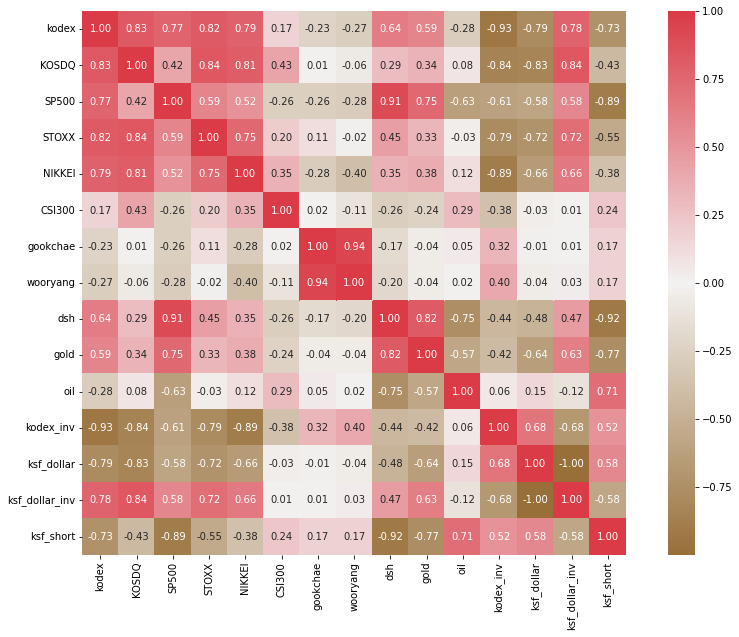

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(50,10,as_cmap=True)
sns.heatmap(eqt.corr(),annot=True,square=True,fmt=".2f",cmap=cmap,center=0)

# 금리

In [ ]:
import urllib.request
url='https://www.bok.or.kr/portal/singl/baseRate/list.do?dataSeCd=01&menuNo=200643'

html= urllib.request.urlopen(url)
print (html)

In [ ]:
from bs4 import BeautifulSoup
soup= BeautifulSoup(html, 'html.parser')
soup

In [ ]:
result=[]
tbody= soup.find("tbody")
tr=tbody.find('tr')
trs=tbody.find_all('tr')
for tr in trs:
    tds=tr.find_all('td')
    year=tds[0].string
    date=tds[1].string
    num=tds[2].string
    result.append([year+" "+date,num])

result

[['2022 05월 26일', '1.75'],
 ['2022 04월 14일', '1.50'],
 ['2022 01월 14일', '1.25'],
 ['2021 11월 25일', '1.00'],
 ['2021 08월 26일', '0.75'],
 ['2020 05월 28일', '0.50'],
 ['2020 03월 17일', '0.75'],
 ['2019 10월 16일', '1.25'],
 ['2019 07월 18일', '1.50'],
 ['2018 11월 30일', '1.75'],
 ['2017 11월 30일', '1.50'],
 ['2016 06월 09일', '1.25'],
 ['2015 06월 11일', '1.50'],
 ['2015 03월 12일', '1.75'],
 ['2014 10월 15일', '2.00'],
 ['2014 08월 14일', '2.25'],
 ['2013 05월 09일', '2.50'],
 ['2012 10월 11일', '2.75'],
 ['2012 07월 12일', '3.00'],
 ['2011 06월 10일', '3.25'],
 ['2011 03월 10일', '3.00'],
 ['2011 01월 13일', '2.75'],
 ['2010 11월 16일', '2.50'],
 ['2010 07월 09일', '2.25'],
 ['2009 02월 12일', '2.00'],
 ['2009 01월 09일', '2.50'],
 ['2008 12월 11일', '3.00'],
 ['2008 11월 07일', '4.00'],
 ['2008 10월 27일', '4.25'],
 ['2008 10월 09일', '5.00'],
 ['2008 08월 07일', '5.25'],
 ['2007 08월 09일', '5.00'],
 ['2007 07월 12일', '4.75'],
 ['2006 08월 10일', '4.50'],
 ['2006 06월 08일', '4.25'],
 ['2006 02월 09일', '4.00'],
 ['2005 12월 08일', '3.75'],
 

In [ ]:
import pandas as pd
df = pd.DataFrame(result)
df.columns

RangeIndex(start=0, stop=2, step=1)

In [ ]:
df.to_csv("kor.csv", encoding = "cp949")

In [ ]:
df[0]=df[0].str.replace(pat=r'[ㄱ-ㅣ가-힣]+', repl= r'', regex=True)

In [ ]:
df['date'] = pd.to_datetime(df[0])

In [ ]:
df['rate_kor'] = df[1]

In [ ]:
kor = df[['date','rate_kor']]

In [ ]:
fed = pd.read_csv("FEDFUNDS.csv")
fed.head()

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [ ]:
fed['date'] = pd.to_datetime(fed['DATE'])
fed['rate_us'] = fed['FEDFUNDS']

In [ ]:
us = fed[['date','rate_us']]

In [ ]:
kor1 = kor.set_index('date')

In [ ]:
us1 = us.set_index('date')

In [ ]:
kor1

,rate_kor
date,
2022-05-26,1.75
2022-04-14,1.50
2022-01-14,1.25
2021-11-25,1.00
2021-08-26,0.75
2020-05-28,0.50
2020-03-17,0.75
2019-10-16,1.25
2019-07-18,1.50


In [ ]:
us2 = us1.query(f"'1999-05-06'<= date <= '2022-05-26'")

In [ ]:
import plotly
import cufflinks
import kaleido
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import Line
plotly.offline.init_notebook_mode()

fig = go.Figure()
fig.add_trace(go.Scatter(kor1, name="한국 금리", mode='lines'))
fig.add_trace(go.Scatter(us2, name="미국 금리 ", mode='lines'))

fig.show()

In [ ]:
plyo.iplot_mpl